Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

Linear Regression MSE: 7049.862344517167
Ridge Regression MSE: 7043.482157919531


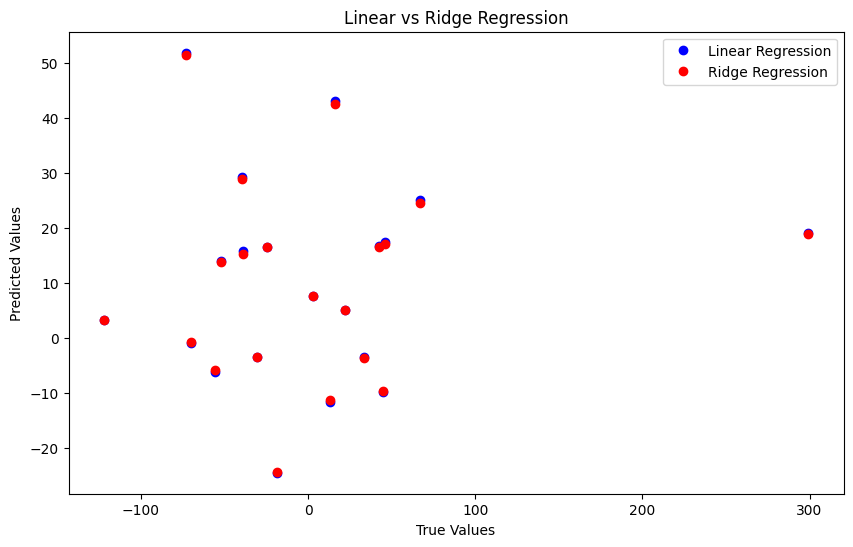

In [1]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset with multicollinearity
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Introducing multicollinearity by making the features highly correlated
X[:, 1] = X[:, 0] + np.random.normal(0, 0.1, size=X.shape[0])  # Correlating feature 1 with feature 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # Regularization strength
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Mean Squared Error (MSE) Comparison
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Output the MSE
print(f"Linear Regression MSE: {mse_linear}")
print(f"Ridge Regression MSE: {mse_ridge}")

# Visualization of predictions
plt.figure(figsize=(10, 6))

plt.plot(y_test, y_pred_linear, 'bo', label='Linear Regression')
plt.plot(y_test, y_pred_ridge, 'ro', label='Ridge Regression')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Linear vs Ridge Regression')
plt.show()


Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

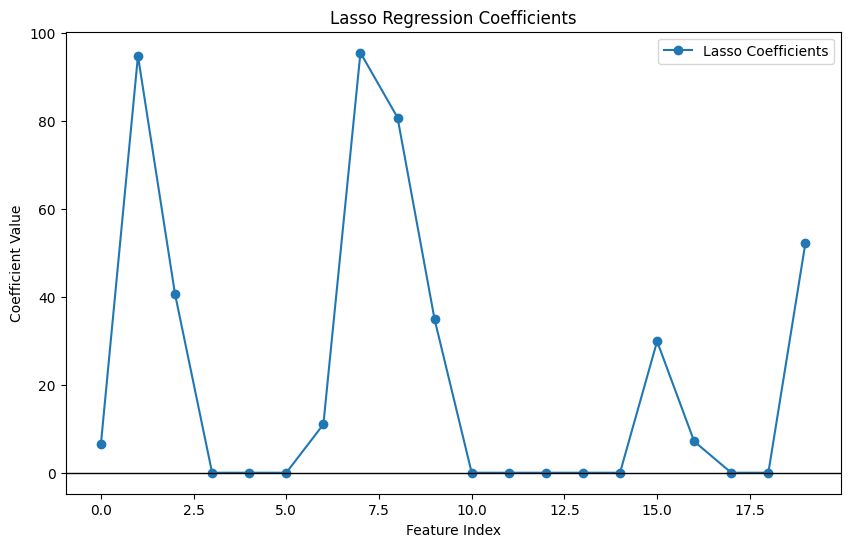

Selected Features (non-zero coefficients): [ 0  1  2  6  7  8  9 15 16 19]
Lasso Regression MSE: 0.11867641198720265


In [2]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a synthetic dataset with many features
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression Model (with L1 regularization)
lasso_model = Lasso(alpha=0.1)  # Regularization strength
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Visualize the coefficients after fitting Lasso
plt.figure(figsize=(10, 6))
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, marker='o', label='Lasso Coefficients')
plt.axhline(0, color='black',linewidth=1)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.legend()
plt.show()

# Check which features were selected (non-zero coefficients)
selected_features = np.where(lasso_model.coef_ != 0)[0]
print(f"Selected Features (non-zero coefficients): {selected_features}")

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")



Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

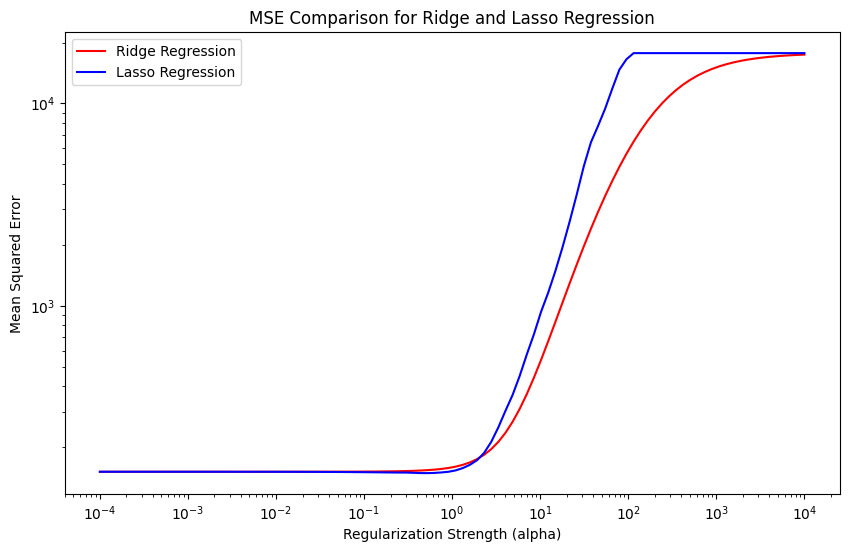

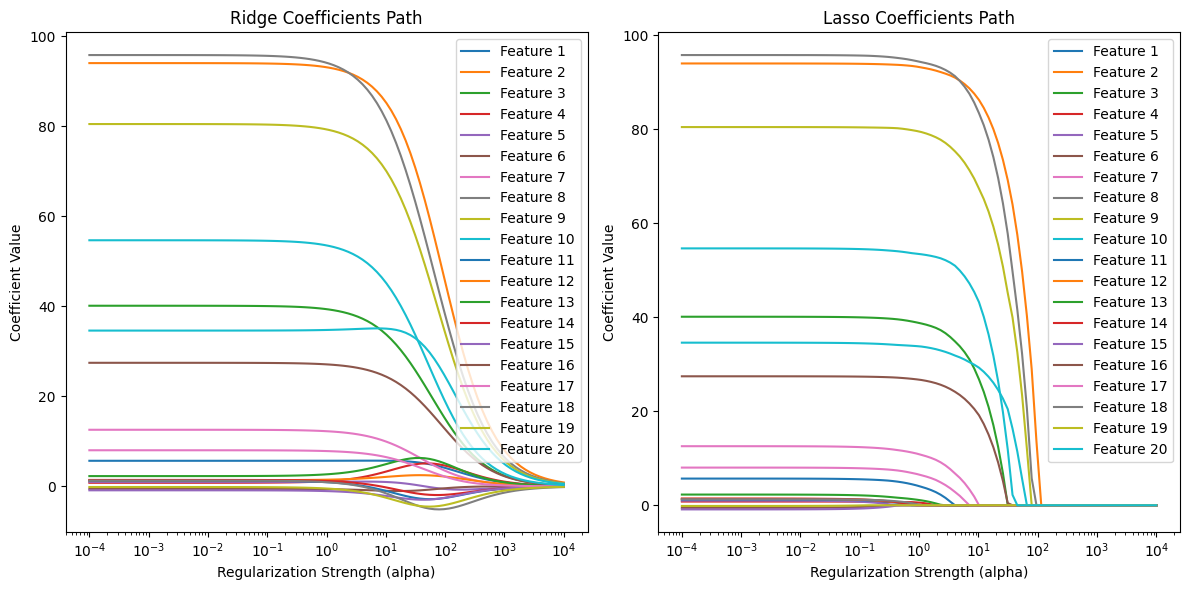

In [3]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=20, noise=10, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regularization strengths to experiment with
alpha_values = np.logspace(-4, 4, 100)  # Range of alpha values (log scale)

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Prepare lists to store performance and complexity metrics
mse_linear, mse_ridge, mse_lasso = [], [], []
coefficients_ridge, coefficients_lasso = [], []

# Iterate over different alpha values for Ridge and Lasso
for alpha in alpha_values:
    # Fit the models
    ridge_model.set_params(alpha=alpha)
    lasso_model.set_params(alpha=alpha)
    
    ridge_model.fit(X_train, y_train)
    lasso_model.fit(X_train, y_train)

    # Predict and compute MSE
    y_pred_ridge = ridge_model.predict(X_test)
    y_pred_lasso = lasso_model.predict(X_test)

    mse_ridge.append(mean_squared_error(y_test, y_pred_ridge))
    mse_lasso.append(mean_squared_error(y_test, y_pred_lasso))

    # Store coefficients
    coefficients_ridge.append(ridge_model.coef_)
    coefficients_lasso.append(lasso_model.coef_)

# Plotting the MSE comparison
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_ridge, label="Ridge Regression", color='red')
plt.plot(alpha_values, mse_lasso, label="Lasso Regression", color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison for Ridge and Lasso Regression')
plt.legend()
plt.show()

# Plotting the coefficient paths for Ridge and Lasso
plt.figure(figsize=(12, 6))

# Ridge coefficients path
plt.subplot(1, 2, 1)
plt.title('Ridge Coefficients Path')
for i in range(X.shape[1]):
    plt.plot(alpha_values, [coef[i] for coef in coefficients_ridge], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Coefficient Value')
plt.legend()

# Lasso coefficients path
plt.subplot(1, 2, 2)
plt.title('Lasso Coefficients Path')
for i in range(X.shape[1]):
    plt.plot(alpha_values, [coef[i] for coef in coefficients_lasso], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Coefficient Value')
plt.legend()

plt.tight_layout()
plt.show()
